# 머신러닝
기계가 분석가가 의도한 대로, 데이터로부터 학습하여 문제를 해결하는 기술. 엔지니어링 과정.

## 0. 머신러닝의 문제들
1. 회귀(Regression in Supervised Learning)
 - target y의 정확한 value를 예측하는 문제
 - target이 여러개가 있을 수도 있고, 한 개만 있을 수도 있다.
 - 데이터 X, 타겟 y가 존재
 - X.shape = (n, p), y.shape = (n,)
2. 분류(Classification in Supervised Learning)
 - target y이 어떤 범주값을 가지고 있고, 데이터를 y의 범주값으로 매칭. 분류
 - 범주가 여러개가 있을 수 있고, 2개만 있을 수 있다.
 - binary problem으로 모두 해결할 수 있다.
 - 데이터 X, 타겟 y가 존재
 - X.shape = (n, p), y.shape = (n,)
3. 비지도학습(Unsupervised Learning)
 - 지도학습에 비해 훨씬 어렵다. 답이 없다.
 - 분석 한 이후, 설득하기 위한 보고서 작업, 시각화이 매우 중요
 - 데이터 내에 있는 미지의 패턴을 식별하는 작업
 - 지도학습의 입력으로도 사용된다.
4. 강화학습(Reinforcement Learning)
 - 답은 모르지만, 바람직한 방향은 알고 있는 문제
 - trial error로부터 개선방향을 찾는 문제
 - env -> state(s(t)) -> policy(pi) -> action(a) -> env -> state(s(t+1))
 
### 학습 데이터
X, y
- X: 엑셀의 표, 데이터베이스의 테이블, pandas의 DataFrame
- y: 1차원 벡터, 열, pandas의 Series
- 행: row, instance, sample, record, tuple, observative, object
- 열: column, feature, vector, sequence, attribute

## 1. linear regression

Set : $y = X \cdot w + b + \epsilon = X \cdot w + \epsilon$
- assume for 1 observative : x = (1, x), w = (b, w)

We know:  (here, v and X is constant about w)

$$\begin{align}
\cfrac {\partial}{\partial w} \left( v^T \cdot w \right) &= v \\
\cfrac {\partial}{\partial w} \left( w^T \cdot v \right) &= v \\
(w^T \cdot A)^T &= A^T \cdot w \\
\cfrac {\partial}{\partial w} \left( w^T \cdot A \cdot w \right) &= A \cdot w + A^T \cdot w
\end{align}$$

So, We solve: y.shape = (N, ), X.shape=(N, p+1), w.shape = (p+1, )

$$\begin{align}
y &= X \cdot w + \epsilon = \hat y + \epsilon\\
Loss(w) &= \epsilon ^2 =||y - \hat y||^2 = (y - X \cdot w)^T \cdot (y - X \cdot w)\\
\cfrac {\partial Loss}{\partial w} &= 2 (X^T \cdot X) \cdot w - 2X^T \cdot y = 0 
\end{align}$$

We get $\hat w$ :
$$ \left| {\cfrac {\partial Loss}{\partial w}} \right|_{w = \hat w} = 0 \Rightarrow 
\hat w = (X^T \cdot X)^{-1} \cdot X^T \cdot y $$

### 1.1 Using statistical tool

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
bunch = load_iris()
bunch.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [2]:
bunch.data.shape

(150, 4)

In [3]:
iris = pd.DataFrame(bunch.data, columns=bunch.feature_names)
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
iris.columns = ['sl', 'sw', 'pl', 'pw']
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sl      150 non-null    float64
 1   sw      150 non-null    float64
 2   pl      150 non-null    float64
 3   pw      150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


petal width를 target으로 회귀식을 생성해보자. 통계에서 회귀식의 formula는 아래와 같이 표현한다.
$$y \sim x_1 + x_2 + x_3$$

In [6]:
' + '.join(iris.columns[:3])

'sl + sw + pl'

In [5]:
# formula = 'y ~ x1 + x2 + x3'
features = iris.columns
formula = '%s ~ '%iris.columns[3]
formula += ' + '.join(iris.columns[:3])
formula

'pw ~ sl + sw + pl'

In [6]:
import statsmodels.formula.api as smf

model = smf.ols(formula = formula, data = iris)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     pw   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     734.4
Date:                Tue, 20 Jul 2021   Prob (F-statistic):           7.83e-88
Time:                        14:43:14   Log-Likelihood:                 36.751
No. Observations:                 150   AIC:                            -65.50
Df Residuals:                     146   BIC:                            -53.46
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2403      0.178     -1.347      0.180      -0.593       0.112
sl            -0.2073      0.048     -4.363      0.000      -0.301      -0.113
sw             0.2228      0.049      4.553      0.000       0.126       0.320
pl             0.5241      0.024     21.399      0.000       0.476       0.572
==============================================================================
Omnibus:                        5.609   Durbin-Watson:                   1.573
Prob(Omnibus):                  0.061   Jarque-Bera (JB):                6.811
Skew:                           0.223   Prob(JB):                       0.0332
Kurtosis:                       3.944   Cond. No.                         90.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
result.params

Intercept   -0.240307
sl          -0.207266
sw           0.222829
pl           0.524083
dtype: float64

### 1.2 Using numpy with linear algebra
Now, we'll compute with numpy :
$$ \hat w =  (X^T \cdot X)^{-1} \cdot X^T \cdot y $$

Set : $y = X \cdot w + b + \epsilon = X \cdot w + \epsilon$
- assume: x = (1, x), w = (b, w). So,
- y = X[:, 3]
- X = np.hstack(np.ones(shape), X[:, :3])

And then, you can use numpy.linalg.inv for inverse matrix.

[Quiz] numpy를 이용하여 $\hat w$를 계산하세요.

In [9]:
y = bunch.data[:, 3]
X = bunch.data[:, :3]
X = np.hstack((np.ones(X.shape[0]).reshape(-1, 1), X))
X[:5]

array([[1. , 5.1, 3.5, 1.4],
       [1. , 4.9, 3. , 1.4],
       [1. , 4.7, 3.2, 1.3],
       [1. , 4.6, 3.1, 1.5],
       [1. , 5. , 3.6, 1.4]])

In [10]:
from scipy.linalg import inv
w = inv(X.T.dot(X)).dot(X.T).dot(y)
w

array([-0.24030739, -0.20726607,  0.22282854,  0.52408311])

In [11]:
result.params

Intercept   -0.240307
sl          -0.207266
sw           0.222829
pl           0.524083
dtype: float64

$\hat y = X \cdot w$로 예측값을 구할 수 있다.

In [14]:
X.dot(w)[-5:]

array([1.76472775, 1.63140328, 1.80618096, 2.06230882, 1.87813229])

In [15]:
y[-5:]

array([2.3, 1.9, 2. , 2.3, 1.8])

회귀모델에서 계산한 $R^2$의 정체
$$\begin{align} 
R^2 &= \text{cor}^2(y, \hat y)\\
\text{cor}(y, \hat y) &= \cfrac {(y - \bar y)\cdot(\hat y - \bar {\hat y})}{n \sigma_y \sigma_{\hat y}}
\end{align}$$

In [18]:
result.rsquared

0.9378502736046809

In [19]:
yhat = X.dot(w)
np.square(np.mean((y - y.mean())*(yhat - yhat.mean()))/(y.std()*yhat.std()))

0.9378502736046815

In [22]:
pd.Series(y).corr(pd.Series(yhat))**2

0.9378502736046817

### 1.3 Machine Learning Method
![](https://img1.daumcdn.net/thumb/R720x0.q80/?scode=mtistory2&fname=http%3A%2F%2Fcfile7.uf.tistory.com%2Fimage%2F994F59375D818E5E36E75D)
$$\text{SGD(경사하강법); Stochastic Gradient Descent}$$

1. 전체 학습데이터의 일부분(batch)을 이용하여 예측을 수행하고
2. 실제 값에서 예측값을 빼서 error구해 손실을 계산하고
3. 손실을 줄이는 방향으로 학습 파라미터(w)를 업데이트하고
4. 1 ~ 3을 전체 학습데이터를 모두 이용할 때까지 반복한 후,
5. 학습데이터를 다시 섞고 1 ~ 4의 과정을 EPOCH의 수만큼 반복한다.

$$\begin{align}
Loss(w) &= \epsilon^2 = (y - X \cdot w)^T \cdot (y - X \cdot w)\\
dW = \cfrac {\partial Loss}{\partial w} &= 2 (X^T \cdot X) \cdot w - 2X^T \cdot y \\
w(t+1) &= w(t) - \text{lr} * \cfrac {\partial Loss}{\partial w} \Bigg|_{w =w(t)}
\end{align}$$

In [23]:
from numpy.random import shuffle, rand
np.random.seed(234)
w = rand(X.shape[-1]) - 0.5
w

array([-0.46903266, -0.24571793,  0.41240044,  0.4701742 ])

In [24]:
EPOCH = 20000 # 50000
batch = 16
lr = 0.0001 # 0.00005
rows = X.shape[0]
losses = []
randRow = np.arange(rows)

for epoch in range(EPOCH):
    # for each epoch, shuffle X, y
    shuffle(randRow)
    loss = 0
    
    for i in range(0, rows, batch):
        batch_index = randRow[i:i+batch]
        x_batch = X[batch_index]
        y_batch = y[batch_index]
        y_hat = x_batch.dot(w)
        loss += (y_batch - y_hat).dot((y_batch - y_hat))
        dw = X.T.dot(X).dot(w) - X.T.dot(y) # = d Loss(w) / d(w)
        w -= lr*dw
        
    loss /= rows
    losses.append(loss)

$$\begin{align}
Loss(w) &= (y - X \cdot w)^T \cdot (y - X \cdot w)\\
\cfrac {\partial Loss}{\partial w} &= 2 (X^T \cdot X) \cdot w - 2X^T \cdot y 
\end{align}$$

In [25]:
w

array([-0.24030739, -0.20726607,  0.22282854,  0.52408311])

In [26]:
result.params.values

array([-0.24030739, -0.20726607,  0.22282854,  0.52408311])

<AxesSubplot:>

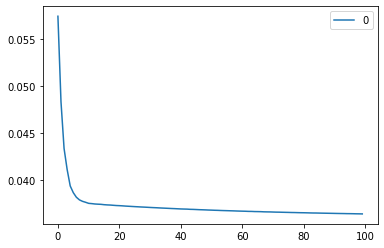

In [27]:
import pandas as pd
%matplotlib inline
loss_df = pd.DataFrame(losses)
loss_df[:100].plot()

<AxesSubplot:>

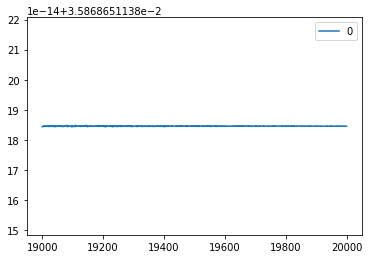

In [30]:
loss_df[19000:].plot()

[Quiz] 다음과 같은 그래프를 그린다:
- y, yhat 간의 산점도를 그린다.
- error, yhat 간의 산점도를 그니다.
- y, yhat을 모두 line 그래프로 그린다.
- y, yhat, error에 대한 histogram을 그린다.

In [ ]:
yhat = X.dot(w)
regDf = pd.DataFrame({'target':y, 'pred':yhat, 'error':y-yhat})
regDf.head()

<AxesSubplot:ylabel='Frequency'>

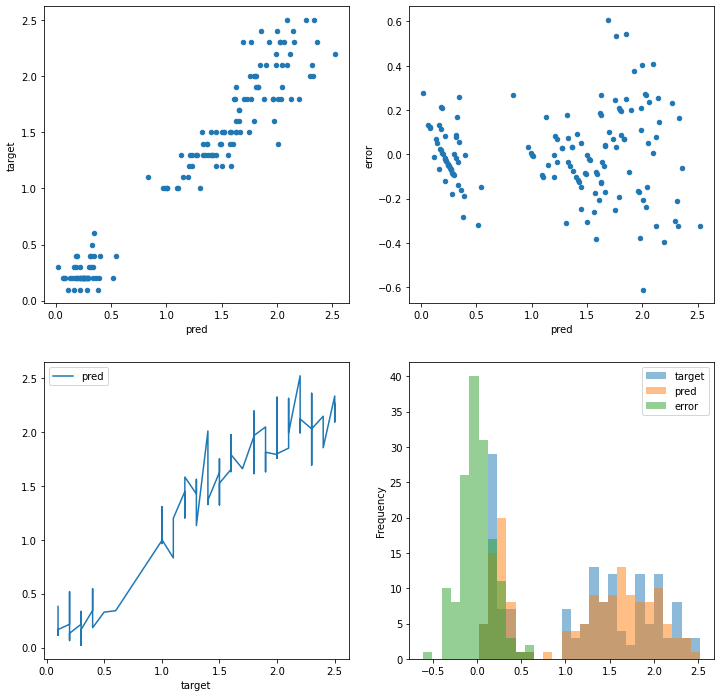

In [46]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2,2, figsize=(12,12))
axes = axes.ravel()
regDf.plot('pred', 'target', kind='scatter', ax=axes[0])
regDf.plot('pred', 'error', kind='scatter', ax=axes[1])
idx = regDf.target.argsort().values
regDf.iloc[idx].plot('target', 'pred', kind='line', ax=axes[2])
# regDf.plot('target', 'pred', kind='line', ax=axes[2])
regDf.plot(kind='hist', ax=axes[3], bins=30, alpha=.5)

Text(0.5, 1.0, 'target > 0.7')

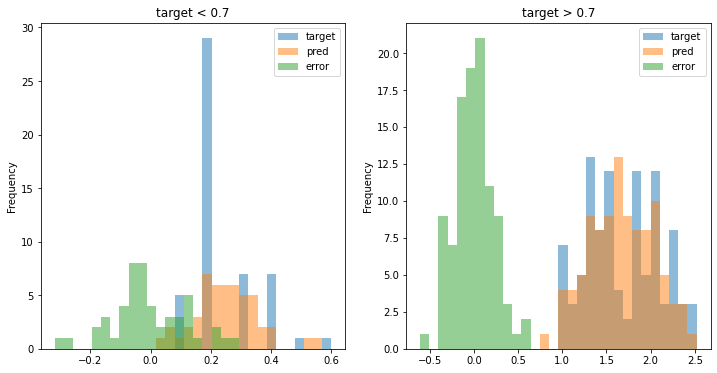

In [44]:
y07bv = regDf.target < .7
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1,2, figsize=(12,6))
regDf[y07bv].plot(kind='hist', ax=axes[0], bins=30, alpha=.5)
regDf[~y07bv].plot(kind='hist', ax=axes[1], bins=30, alpha=.5)
axes[0].set_title("target < 0.7")
axes[1].set_title("target > 0.7")

In [53]:
outlierbv = (regDf.error.abs() > .41).values

### 1.4 sklearn 이용방법

In [33]:
from sklearn.linear_model import LinearRegression
X, y = bunch.data[:,:3], bunch.data[:,3]

lr = LinearRegression().fit(X, y)
print(result.params.values)
lr.intercept_, lr.coef_

[-0.24030739 -0.20726607  0.22282854  0.52408311]


(-0.24030738911226024, array([-0.20726607,  0.22282854,  0.52408311]))

## 2. classification
We consider binary classification, and want to predict not directly <font color='red'>y</font> but <font color='blue'>p(y=1)</font>.

We Set:

$$\begin{align}
\hat y &= P(y=1) = \sigma(X \cdot w) \\
\sigma(z) &= \cfrac 1 {1+\exp(-z)}\\
\cfrac {\partial \sigma(z)}{\partial z} &= \cfrac {\exp(-z)} {(1+\exp(-z))^2} = \sigma(z)(1-\sigma(z))\\
Loss(w) &= NLL(w) 
= - \left[ y^T \cdot \log P(y=1) \right] - \left[ (1-y)^T \cdot \log (1-P(y=1)) \right] \\
\cfrac {\partial Loss}{\partial w} &= - X^T \cdot \left[ y * (1 - P(y=1)) \right] + X^T \cdot \left[(1-y) * P(y=1) \right] \\
&= X^T \cdot (\hat y - y)
\end{align}$$

We update w with :
$$w(t+1) = w(t) - lr * \cfrac {\partial Loss}{\partial w} \Bigg|_{w =w(t)}$$

---
### likelihood vs Loss
Likelihood(우도; 그럴싸함)
- $L_i = y_i*P(y_i = 1) + (1-y_i)*P(y_i = 0)$ : P(y=0) + P(y=1) = 1

$$\begin{align}L_i &= P(y_i=1)^{y_i} * [1 - P(y_i=1)]^{1-y_i}\\
L_j &= P(y_j=1)^{y_j} * [1 - P(y_j=1)]^{1-y_j}\\
L_{ij} &= \left[ P(y_i=1)^{y_i} * [1 - P(y_i=1)]^{1-y_i} \right] * \left[ P(y_j=1)^{y_j} * [1 - P(y_j=1)]^{1-y_j} \right] \\
L_{1..n} &= \Pi_{i=1}^n {P(y_i=1)^{y_i} * [1 - P(y_i=1)]^{1-y_i}} \\
\log {L_{1..n}} &= \sum_{i=1}^n {y_i * \log P(y_i=1) + (1-y_i) * \log {[1 - P(y_i=1)]}} \\
NNL_{i..i} &= - \sum_{i=1}^n \left[ {y_i * \log P(y_i=1) + (1-y_i) * \log {[1 - P(y_i=1)]}} \right] \\
&= - \left[ y^T \cdot \log P(y=1) \right] - \left[ (1-y)^T \cdot \log (1-P(y=1)) \right]
\end{align}$$

Loss = NLL(Negative Log Likelihood) : CrossEntropy라고도 부르며, 두분포 y, P(y=1)이 얼마나 다른 지를 측정하는 지표

### 2.1 statistical tool
binary case만을 고려하기 위해, 인위적인 분류문제를 생성하자.

In [1]:
from sklearn.datasets import make_classification

X, y = make_classification(n_features=4, n_redundant=0, n_informative=1,
                           n_clusters_per_class=1, random_state=4)
print(X.shape)
X[:5]

(100, 4)


array([[-0.31629979,  0.70803893, -2.29291305,  0.28220666],
       [-0.67690095, -0.77936232, -1.12511459, -0.85295128],
       [ 2.70496343,  1.81256131,  0.09005406,  0.62008331],
       [ 0.5868326 ,  0.36681905, -0.45731792, -0.46723319],
       [ 0.65746416, -1.15725619, -0.03396529, -0.40039299]])

In [2]:
import statsmodels.api as sm
X = sm.add_constant(X)
print(X.shape)
X[:5]

(100, 5)


array([[ 1.        , -0.31629979,  0.70803893, -2.29291305,  0.28220666],
       [ 1.        , -0.67690095, -0.77936232, -1.12511459, -0.85295128],
       [ 1.        ,  2.70496343,  1.81256131,  0.09005406,  0.62008331],
       [ 1.        ,  0.5868326 ,  0.36681905, -0.45731792, -0.46723319],
       [ 1.        ,  0.65746416, -1.15725619, -0.03396529, -0.40039299]])

In [3]:
model = sm.Logit(y, X)
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.124262
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       95
Method:                           MLE   Df Model:                            4
Date:                Wed, 21 Jul 2021   Pseudo R-squ.:                  0.8207
Time:                        15:08:09   Log-Likelihood:                -12.426
converged:                       True   LL-Null:                       -69.295
Covariance Type:            nonrobust   LLR p-value:                 1.161e-23
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3037      0.603      0.503      0.615      -0.879       1.486
x1            -1.0410      0.731     -1.423      0.155      -2.474       0.392
x2             5.6889      1.538      3.700      0.000       2.675       8.703
x3            -0.2788      0.553     -0.504      0.614      -1.363       0.805
x4            -0.8798      0.659     -1.336      0.182      -2.171       0.411
==============================================================================

Possibly complete quasi-separation: A fraction 0.16 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [4]:
result.params

array([ 0.30366162, -1.04095437,  5.68894902, -0.27882206, -0.87983546])

### 2.2 Using numpy with linear algebra
can't get exact solution, but approximation method with Hessian Matrix

### 2.3 Machine Learning Method
#### 1) SGD(확률적 경사하강법)
1. 전체 학습데이터의 일부분(batch)을 이용하여 예측을 수행하고
2. 예측결과를 실제 값과 구분하여 손실을 계산하고
3. 손실을 줄이는 방향으로 학습 파라미터(w)를 업데이트하고
4. 1 ~ 3을 전체 학습데이터를 모두 이용할 때까지 반복한 후,
5. 학습데이터를 다시 섞고 1 ~ 4의 과정을 EPOCH의 수만큼 반복한다.

In [5]:
import numpy as np
from numpy.random import shuffle, rand
np.random.seed(234)
w = rand(X.shape[-1]) - 0.5
w

array([-0.46903266, -0.24571793,  0.41240044,  0.4701742 , -0.25338022])

In [8]:
EPOCH = 150000 # 50000
batch = 34 # 2^n이 좋으나 데이터가 100개라 1/3로 함
lrs = [0.0005, 0.00005, 0.00001]
rows = X.shape[0]
losses = []
randRow = np.arange(rows)
MIN = 10**(-12)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

for epoch in range(EPOCH):
    # for each epoch, shuffle X, y
    shuffle(randRow)
    loss = 0
    if epoch < 50000:
        lr = lrs[0]
    elif epoch < 100000:
        lr = lrs[1]
    else: lr = lrs[2]
    
    for i in range(0, rows, batch):
        batch_index = randRow[i:i+batch]
        x_batch = X[batch_index]
        y_batch = y[batch_index]
        # 아래는 직접 구현해보세요.
        yhat = sigmoid(x_batch.dot(w))
        loss += - y_batch.T.dot(np.log(yhat + MIN)) \
                - (1-y_batch).T.dot(np.log(1-yhat + MIN))
        w -= lr*x_batch.T.dot(yhat - y_batch)
        
    loss /= rows
    losses.append(loss)

$$\begin{align}
\hat y &= P(y=1) = \sigma(X \cdot w) \\
Loss(w) &= NLL(w) 
= - \left[ y^T \cdot \log P(y=1) \right] - \left[ (1-y)^T \cdot \log (1-P(y=1)) \right] \\
\cfrac {\partial Loss}{\partial w} &= X^T \cdot (\hat y - y) = dw \\
w &= w - \text{lr}*dw
\end{align}$$

In [9]:
w

array([ 0.30365802, -1.04094783,  5.68892901, -0.27881858, -0.87982789])

In [10]:
result.params

array([ 0.30366162, -1.04095437,  5.68894902, -0.27882206, -0.87983546])

#### 2) 모멘텀 기법 사용하기
<참고> https://twinw.tistory.com/247
$$v(t+1) = m * v(t) - \alpha \cfrac {\partial \text{Loss}(w)}{\partial w} \\
w(t+1) = w(t) + v(t+1)$$

```
v(t+1) = m * v(t) - a * dW(t)
W(t+1) = W(t) + v(t+1)

v(0) = 0, m = 0.9
v(1) = - a * dW(0)
W(1) = W(0) + v(1) = W(0) - a * dW(0)

v(2) = m * v(1) - a * dW(1) = - 0.9 * a * dW(0) - a * dW(1)
W(2) = W(1) - a * [ 0.9 * dW(0) + dW(1) ]

v(3) = m * v(2) - a * dW(2) = - a * [ 0.9 * 0.9 * dW(0) + 0.9 * dW(1) + dW(2) ]
W(3) = W(2) + v(3) = W(2) - a * [ 0.9 * 0.9 * dW(0) + 0.9 * dW(1) + dW(2) ]
```
- a: learning rate
- m: momentum. memory of prior velocity. generally 0.9 ~ 0.99
- v: velocity. moving speed and direction.

```python
v = m * v - learning_rate * dW
W += v
```

In [11]:
import numpy as np
from numpy.random import shuffle, rand
np.random.seed(123)
w = rand(X.shape[-1]) - 0.5
w

array([ 0.19646919, -0.21386067, -0.27314855,  0.05131477,  0.21946897])

In [12]:
EPOCH = 50000 # 50000
batch = 34
lrs = [0.0005, 0.00005, 0.00001]
lr = 0.00005
rows = X.shape[0]
losses = []
randRow = np.arange(rows)
m = 0.95
v = np.zeros(w.shape)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

for epoch in range(EPOCH):
    # for each epoch, shuffle X, y
    shuffle(randRow)
    loss = 0
    if epoch < 20000:
        lr = lrs[0]
    elif epoch < 40000:
        lr = lrs[1]
    else: lr = lrs[2]
    
    for i in range(0, rows, batch):
        batch_index = randRow[i:i+batch]
        x_batch = X[batch_index]
        y_batch = y[batch_index]
        yhat = sigmoid(x_batch.dot(w))
        loss += - y_batch.T.dot(np.log(yhat + MIN)) \
                - (1-y_batch).T.dot(np.log(1-yhat + MIN))
        dw = x_batch.T.dot(yhat - y_batch)
        # w -= lr*dw
        v = m*v - lr*dw
        w += v
        
    loss /= rows
    losses.append(loss)

In [13]:
w

array([ 0.30366195, -1.0409778 ,  5.68896112, -0.27881419, -0.8798264 ])

In [14]:
result.para
ms

array([ 0.30366162, -1.04095437,  5.68894902, -0.27882206, -0.87983546])

<AxesSubplot:>

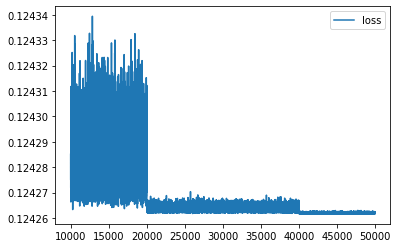

In [16]:
import pandas as pd
lossdf = pd.DataFrame(losses, columns=["loss"])
lossdf[10000:].plot()

#### 3) Nesterov 기법 사용하기
![](https://t1.daumcdn.net/cfile/tistory/996E494B5B0D03A003)

```python
v = m * v - learning_rate * d(w + m*v)
w += v
```

In [17]:
import numpy as np
from numpy.random import shuffle, rand
np.random.seed(234)
w = rand(X.shape[-1]) - 0.5
w

array([-0.46903266, -0.24571793,  0.41240044,  0.4701742 , -0.25338022])

In [18]:
EPOCH = 50000 # 50000
batch = 34
lrs = [0.0005, 0.00005, 0.00001, 0.000005]
lr = 0.00005
rows = X.shape[0]
losses = []
randRow = np.arange(rows)
m = 0.95
v = 0

def sigma(z):
    return 1 / (1 + np.exp(-z))

for epoch in range(EPOCH):
    # for each epoch, shuffle X, y
    shuffle(randRow)
    loss = 0
    if epoch < 10000:
        lr = lrs[0]
    elif epoch < 20000:
        lr = lrs[1]
    elif epoch < 40000:
        lr = lrs[2]
    else: lr = lrs[3]
    
    for i in range(0, rows, batch):
        batch_index = randRow[i:i+batch]
        x_batch = X[batch_index]
        y_batch = y[batch_index]
        yhat = sigmoid(x_batch.dot(w))
        loss += - y_batch.T.dot(np.log(yhat + MIN)) \
                - (1-y_batch).T.dot(np.log(1-yhat + MIN))
        # you must calculus d(w+m*v)
        yhatAhead = sigmoid(x_batch.dot(w+m*v))
        dwAhead = x_batch.T.dot(yhatAhead - y_batch)
        v = m*v - lr*dwAhead
        w += v
        
    loss /= rows
    losses.append(loss)

In [19]:
w

array([ 0.30365319, -1.04096611,  5.68895429, -0.2788235 , -0.87983918])

In [20]:
result.params

array([ 0.30366162, -1.04095437,  5.68894902, -0.27882206, -0.87983546])

<AxesSubplot:>

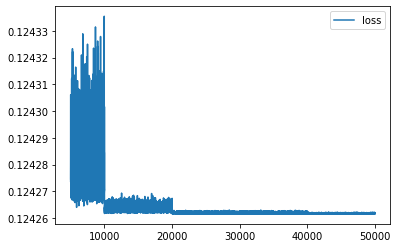

In [22]:
lossdf = pd.DataFrame(losses, columns=["loss"])
lossdf[5000:].plot()

#### 4) RMSprop 사용하기
```python
v = m * v + (1 - m) * dw**2
w += - learning_rate * dw / (np.sqrt(v) + eps)
```

In [49]:
import numpy as np
from numpy.random import shuffle, rand
np.random.seed(234)
w = rand(X.shape[-1]) - 0.5
w

array([-0.46903266, -0.24571793,  0.41240044,  0.4701742 , -0.25338022])

In [50]:
EPOCH = 50000 # 50000
batch = 34
# lrs = [0.0005, 0.00005, 0.00001, 0.000005]
lr = 0.0005
rows = X.shape[0]
losses = []
randRow = np.arange(rows)
m = 0.95
v = np.zeros(w.shape)
eps=1e-10


def sigmoid(z):
    return 1 / (1 + np.exp(-z))

for epoch in range(EPOCH):
    # for each epoch, shuffle X, y
    shuffle(randRow)
    loss = 0
    
    for i in range(0, rows, batch):
        batch_index = randRow[i:i+batch]
        x_batch = X[batch_index]
        y_batch = y[batch_index]
        yhat = sigmoid(x_batch.dot(w))
        loss += - y_batch.T.dot(np.log(yhat + MIN)) \
                - (1-y_batch).T.dot(np.log(1-yhat + MIN))
        # 아래 사항 구현하세요.
        dw = x_batch.T.dot(yhat - y_batch)
        v = m * v + (1 - m) * dw**2
        w += - lr * dw / (np.sqrt(v) + eps)
        
    loss /= rows
    losses.append(loss)

In [51]:
w

array([ 0.30795988, -1.04916538,  5.71735805, -0.2813089 , -0.8835331 ])

In [52]:
result.params

array([ 0.30366162, -1.04095437,  5.68894902, -0.27882206, -0.87983546])

### SVM

![](https://t1.daumcdn.net/cfile/tistory/995D673359E9AD3537)
$$Score(y=1) = X \cdot w + b$$

#### 개념
![](https://cgp.iiarjournals.org/content/cgp/15/1/41/F1.medium.gif)

여기서 분류평면은 $\mathbf w^T \mathbf x + b = 0$으로 표현되며, 분류평면과 평행하며, support vector가 놓인 두개의 평면은 각각 아래 그림과 같이 설정하자.
![](http://i.imgur.com/afe8W3S.png)
- 분류평면에 임의의 값을 곱해도 그 값은 변하지 않고 0이므로,
- 우리는 적절한 값을 곱하여 각 support vector 평면들을 각각 1, -1로 두는 것이 가능하다.

분류 평면 위에 놓인 임의의 두 점 $\mathbf x_1 \mathbf x_2$은 각각 분류 평면 위에 있으므로, 아래 식을 만족한다.
$$\mathbf w^T \mathbf x_1 + b = 0 \quad \cdots \quad (1)$$
$$\mathbf w^T \mathbf x_2 + b = 0 \quad \cdots \quad (2)$$

이때 위 식(1)에서 식(2)를 빼면, hyperplane 위에 위치한 임의의 직선 벡터 $\mathbf x_1 - \mathbf x_2$에 대해 아래 식이 항상 성립한다.
$$\mathbf w^T (\mathbf x_1 - \mathbf x_2) = 0 \quad \cdots \quad (3)$$

즉, weights vector $\mathbf w$는 항상 hyperplane과 수직이다.


##### hyperplane 찾기
Margine을 최대화하는 hyperplane은 식 (7)를 최적화하는 $\mathbf w$가 솔루션이다.
$$max\frac { 2 }{ { \left\| w \right\|  }_{ 2 } } \rightarrow \min { \frac { 1 }{ 2 } { \left\| w \right\|  }_{ 2 }^{ 2 } } \quad \cdots \quad (7)$$

hyperplane을 경계로 위쪽의 samples $\mathbf x_+$와 아래쪽의 samples $\mathbf x_-$에 대해 다음식이 성립한다:
$$\mathbf w^T \mathbf x_+ + b \ge +1 \quad \cdots \quad (8)$$
$$\mathbf w^T \mathbf x_- + b \le -1 \quad \cdots \quad (9)$$

또한 이때의 class label y에 대해 $y_+ = +1$, $y_- = -1$이므로, 제약식 (10)이 성립한다.
$$y_i (\mathbf w^T \mathbf x_i + b) \ge 1 \quad \cdots \quad (10)$$

따라서 모든 i에 대해 식 (10)의 제약조건을 만족하면서, 식 (7)을 최소화하는 $\mathbf w, b$를 찾으면 된다.

Loss는 아래와 같이 계산된다.
$$Loss = \frac {1}{2} {\left\| w \right\|}_{2}^{2} + \max{(1 - y \cdot (\mathbf X \cdot \mathbf w + b))}$$

#### Soft Margin과 C-SVM
이제까지 엄격히 두 개의 클래스를 구분하는 결정 경계선을 구하는 Hard Margin 방법을 사용했다. 그러나 현실에서는 아래 그림과 같이 선형 경계로는 두 개의 클래스를 완벽하게 결정할 수 없는 경우가 대부분이다.
![](http://i.imgur.com/5OVa7IM.png)

이경우 2가지의 해결방법이 있는데:
1. Support Vectors와 hyperplane 사이. 즉, 마진 내에 오분류될 수 있는 관측치를 허용하는 Soft Margin.
2. 다음에 설명할 선형 결정경계를 사용하지 않고, 올록볼록한 결정경계를 갖는 Kernel Trick.

여기서는 먼저 아래 그림과 같이 Soft Margin을 사용하는 C-SVM 기법을 설명하겠다.
![](http://i.imgur.com/vlG124W.png)

위 그림에서 minus-plane을 벗어난 빨간점과 plus-plane을 벗어난 파란점이 보인다.(이러한 점들을 slack이라 부른다.) 마진을 최대화하되 이런 관측치들을 허용하는 게 바로 C-SVM이다. 

이를 수식으로 표현하면 아래와 같다:
$${ y }_{ i }({ w }^{ T }{ x }_{ i }+b)\ge 1-{ \xi  }_{ i },\quad { \xi  }_{ i }\ge 0 \quad \cdots \quad (15)$$
- 서포트 벡터가 위치한 경계선을 두고 $\xi_i$ 만큼의 오류를 인정한다는 의미이다.
- 위 그림에서 파란색 slack과 + plane과의 거리가 $l_+$라면:
 - $1: \cfrac 1 {|\mathbf w|} = \xi_+ : l_+$이므로, $\xi_+ = l_+ |\mathbf w|$ 이다.
- 역시 빨간색 slack과 - plane과의 거리rk $l_-$인 경우, $\xi_- = l_- |\mathbf w|$ 이다.

이제 우리는 2개 항을 최소로 유지해야 한다:
1. Margine을 최대화 하는 것으로부터: $\min { \frac 1 2 { \left\| \mathbf w \right\|  }_{ 2 }^{ 2 } }$
2. slack points' length를 최소화하기 위해: $\min \sum_i \xi_i$

각 최적화 항에 대한 가중치 계수로 $C$를 도입하면 식 (7)은 다음과 같이 쓸 수 있다:
$$\min \frac 1 2 ||\mathbf w ||_2^2 + C \sum_i \xi_i \quad \cdots \quad (16)$$
- 이때의 제약조건은 식 (15)이다.
- 이 식은 아래와 같이 L2 loss를 나타내는 $\alpha$로 다음과 같이 정식화할 수 있다.
- $\min \frac 1 2 \alpha ||\mathbf w ||_2^2 + \sum_i \xi_i$, 여기서 $\alpha = \cfrac 1 C$이다.

이를 L2 loss와 결부하여 해석하면, Margine을 최대화하는 것과 Slack points를 최소화하는 것은 서로 trade-off 관계가 있으므로, 이를 가중치 계수 C로 조절하는 데:
- C가 커지면, Margine 최대화보다는 이상치로 볼 수 있는 slack points를 줄이고, 이상치를 정상적인 관측치라 보겠다는 전략이고, 
- 반대로 C가 1 보다 작으면, Margine을 최대화하여 일반화를 추구하겠다는 의미이다.
